In [13]:
import sys
sys.path

['C:\\Users\\ghrms\\PycharmProjects\\project\\auto_run',
 'C:\\Users\\ghrms\\PycharmProjects\\project',
 'C:\\Users\\ghrms\\anaconda3\\envs\\project\\python38.zip',
 'C:\\Users\\ghrms\\anaconda3\\envs\\project\\DLLs',
 'C:\\Users\\ghrms\\anaconda3\\envs\\project\\lib',
 'C:\\Users\\ghrms\\anaconda3\\envs\\project',
 '',
 'C:\\Users\\ghrms\\anaconda3\\envs\\project\\lib\\site-packages',
 'C:\\Users\\ghrms\\anaconda3\\envs\\project\\lib\\site-packages\\win32',
 'C:\\Users\\ghrms\\anaconda3\\envs\\project\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\ghrms\\anaconda3\\envs\\project\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\ghrms\\anaconda3\\envs\\project\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\ghrms\\.ipython',
 'C:\\Program Files\\JetBrains\\PyCharm 2020.1.1\\plugins\\python\\helpers\\pydev',
 'C:\\Program Files\\JetBrains\\PyCharm 2020.1.1\\plugins\\python\\helpers-pro\\jupyter_debug']

In [19]:
from scipy.spatial import distance
import numpy as np

def make_line(coordinates_points):
    result= np.where((distance.cdist(coordinates_points,coordinates_points)<=1) &(distance.cdist(coordinates_points,coordinates_points)>0))
    return np.c_[result]+1

coordinates_points = [(0,0,0),(0,1,0),(1,0,0),(1,1,0),(0,0,1),(0,1,1),(1,0,1),(1,1,1),(0.5,0.5,0.5)
                      ]

coordinates_lines = [[1,2],[1,3],[1,5],[2,4],[2,6],[3,4],[3,7],[4,8],[5,6],[5,7],[6,8],[7,8],[9,10],[9,11],[9,12],[9,13],[10,11],[10,13],[10,14],[11,12],[11,14],[12,13],[12,14],[13,14]
                     ]
make_line(coordinates_points)

array([[1, 2],
       [1, 3],
       [1, 5],
       [1, 9],
       [2, 1],
       [2, 4],
       [2, 6],
       [2, 9],
       [3, 1],
       [3, 4],
       [3, 7],
       [3, 9],
       [4, 2],
       [4, 3],
       [4, 8],
       [4, 9],
       [5, 1],
       [5, 6],
       [5, 7],
       [5, 9],
       [6, 2],
       [6, 5],
       [6, 8],
       [6, 9],
       [7, 3],
       [7, 5],
       [7, 8],
       [7, 9],
       [8, 4],
       [8, 6],
       [8, 7],
       [8, 9],
       [9, 1],
       [9, 2],
       [9, 3],
       [9, 4],
       [9, 5],
       [9, 6],
       [9, 7],
       [9, 8]], dtype=int64)

In [12]:
import pandas as pd

df =  pd.DataFrame(columns=['structure', 'coordinates_points'])
row = pd.Series(['BCC',[(0,0,0),(0,1,0),(1,0,0),(1,1,0),(0,0,1),(0,1,1),(1,0,1),(1,1,1),(0.5,0.5,0.5)]],
            index=['structure', 'coordinates_points'])
df = df.append(row, ignore_index=True)
row = pd.Series(['batio',coordinates_points],
            index=['structure', 'coordinates_points'])
df = df.append(row, ignore_index=True)
df

,structure,coordinates_points
0,BCC,"[(0, 0, 0), (0, 1, 0), (1, 0, 0), (1, 1, 0), (..."
1,batio,"[(0, 0, 0), (0, 1, 0), (1, 0, 0), (1, 1, 0), (..."


In [13]:
df.to_csv('./data/coordinates_points_data.csv', index=False)

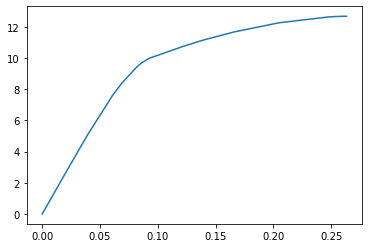

In [35]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress

df = pd.read_excel('../bcc.xlsx')


plt.plot(df['strain'], df['stress'])

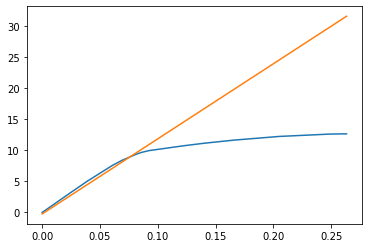

In [36]:
elastic_min_stress = 2
elastic_max_stress = 8


e_stress = df.stress[df.stress.between(elastic_min_stress,elastic_max_stress)]
e_strain = df.strain[df.stress.between(elastic_min_stress,elastic_max_stress)]
res = linregress(e_strain, e_stress)
youngs_modulus = res[0]
stress_offset = youngs_modulus*(df.strain - 0.002)
plt.plot(df.strain, df.stress, df.strain, stress_offset)

In [37]:
for i in range(2, len(df.strain)):
    #when the offset line is first goes above the stress strain curve...
    if stress_offset[i] > df.stress[i]:
        # pull out the points from the stress strain curve
        sx1 = df.strain[i-1]
        sy1 = df.stress[i-1]
        sy2 = df.stress[i]
        sx2 = df.strain[i]
        # pull out the points from the 0.002 offset line
        ox1 = df.strain[i-1]
        oy1 = stress_offset[i-1]
        ox2 = df.strain[i]
        oy2 = stress_offset[i]
        break
x1 = ox1
y1 = oy1
x2 = ox2
y2 = oy2
x3 = sx1
y3 = sy1
x4 = sx2
y4 = sy2

YS = ( (x1*y2-y1*x2)*(y3-y4) - (y1-y2)*(x3*y4-y3*x4)  ) / ( ( (x1-x2) * (y3-y4) ) - ( (y1-y2)*(x3-x4) ))

print('youngs modulus:', youngs_modulus,'\n yield_point', YS)
 

youngs modulus: 121.13005876305743 
 yield_point 8.930860663525548
